In [1]:
import os
import pandas as pd
import snscrape.modules.twitter as sntwitter
from datetime import datetime
from dateutil.relativedelta import relativedelta

from tqdm.notebook import tqdm

In [2]:
for tweet in sntwitter.TwitterSearchScraper('bike').get_items():
    break
tweet

Tweet(url='https://twitter.com/Willyanogueira/status/1647674645519237123', date=datetime.datetime(2023, 4, 16, 18, 53, 42, tzinfo=datetime.timezone.utc), rawContent='Dia bom pra andar de bike na hp', renderedContent='Dia bom pra andar de bike na hp', id=1647674645519237123, user=User(username='Willyanogueira', id=917164971053715456, displayname='Willyan🇦🇹', rawDescription='Pai da Aurora ❤️\n@vianamelyne 💍\nantirracista ✊🏽', renderedDescription='Pai da Aurora ❤️\n@vianamelyne 💍\nantirracista ✊🏽', descriptionLinks=None, verified=False, created=datetime.datetime(2017, 10, 8, 23, 9, 4, tzinfo=datetime.timezone.utc), followersCount=290, friendsCount=273, statusesCount=11248, favouritesCount=3435, listedCount=0, mediaCount=70, location='Rio Grande, Brasil', protected=False, link=TextLink(text='Instagram.com/willyan_noguei…', url='http://Instagram.com/willyan_nogueiraa', tcourl='https://t.co/FQMcxhL8I8', indices=(0, 23)), profileImageUrl='https://pbs.twimg.com/profile_images/16455935789140623

#### Twitter scraping
Using:
- text_query for search parameter. Will be the bike share company name?
- max_tweets for limit on number of tweets pulled
- start_date and end_date for the time ranges for when to pull the data

Query starts at the end date and then works backward pulling tweets until it hits the max_tweets or the start date. So to make sure we aren't pulling data only from the end of the year (eg. weather might be worse and people biking less), creating miny pulls for each month of the year and then aggregating them all together. 

In [ ]:
# tweet query parameters
text_query = "encicla"
max_tweets = 10

# time parameters for extracting tweets

tweet_data = []

# because of time query parameters, seperate each query by month. then append all into one dataframe
start_date="2020-01-01"
for month in range(0,12,1):
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = (start_date + relativedelta(months=1)).strftime('%Y-%m-%d')
    start_date = start_date.strftime('%Y-%m-%d')
    
    # for each month, scrape twitter based on query parameters
    for i, tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper(f'{text_query} since:{start_date} until:{end_date}').get_items()), total=max_tweets):
        
    # pull specific parameters from tweet
        data = [
            tweet.date,
            tweet.rawContent,
            tweet.coordinates,
            tweet.lang,
            tweet.hashtags,
            tweet.user.location,
            tweet.place
        ]

        # append data into list with all tweets pulled
        tweet_data.append(data)
        
        # stop if we've reached the max number of tweets desired
        if i > max_tweets: 
            break

    df = pd.DataFrame(tweet_data, columns=['date','content', 'coordinates', 'language', 'hashtags', 'location', 'place'])
    
    start_date = end_date


In [5]:
def twitter_scrape(text_query, num_months, start_date, max_tweets=100):

    tweet_data = []

    # because of time query parameters, seperate each query by month. then append all into one dataframe
    for month in range(0,num_months,1):
        start_date = datetime.strptime(start_date, '%Y-%m-%d')
        end_date = (start_date + relativedelta(months=1)).strftime('%Y-%m-%d')
        start_date = start_date.strftime('%Y-%m-%d')
        
        # for each month, scrape twitter based on query parameters
        for i, tweet in enumerate(sntwitter.TwitterSearchScraper(f'{text_query} since:{start_date} until:{end_date}').get_items()):
            
        # pull specific parameters from tweet
            data = [
                tweet.date,
                tweet.rawContent,
                tweet.coordinates,
                tweet.lang,
                tweet.hashtags,
                tweet.user.location,
                tweet.place
            ]

            # append data into list with all tweets pulled
            tweet_data.append(data)
            
            # stop if we've reached the max number of tweets desired
            if i > max_tweets: 
                break

        df = pd.DataFrame(tweet_data, columns=['date','content', 'coordinates', 'language', 'hashtags', 'location', 'place'])
        
        start_date = end_date
    
    return df

In [11]:
df = twitter_scrape('citi bike', 12, '2015-01-01',10)
df

,date,content,coordinates,language,hashtags,location,place
0,2015-01-31 22:58:36+00:00,“@Macarenaurenda: Interesante iniciativa la de...,"Coordinates(longitude=-71.56810113, latitude=-...",es,None,"Viña del Mar, Chile","Place(id='008be613029d4ca5', fullName='Viña de..."
1,2015-01-31 22:56:55+00:00,Interesante iniciativa la de Citibike en Miami...,None,it,None,Chile,None
2,2015-01-31 20:54:49+00:00,@tanbudfox will smoke you on the borrowed Citi...,None,en,None,Mare Nostrum,None
3,2015-01-31 20:52:40+00:00,Did I really ride home on a citi bike last nig...,None,en,None,"Brooklyn, NY",None
4,2015-01-31 20:06:38+00:00,Our fave @MaisonAubele on a citibike bike craw...,None,en,None,Los Angeles,None
...,...,...,...,...,...,...,...
139,2015-12-31 21:33:33+00:00,NYC Citi Bike Program Hits 10 Million Trip Mil...,None,en,"[newyork, nyc]","New York, New York",None
140,2015-12-31 21:33:27+00:00,#Queens #NY NYC Citi Bike Program Hits 10 Mill...,None,en,"[Queens, NY]","Ozone Park, NY 11417",None
141,2015-12-31 21:32:38+00:00,NYC Citi Bike Program Hits 10 Million Trip Mil...,None,en,None,NYC,None
142,2015-12-31 21:24:50+00:00,#NYC #News Citi Bike notches record 10-million...,None,en,"[NYC, News]",New York,None


<AxesSubplot:>

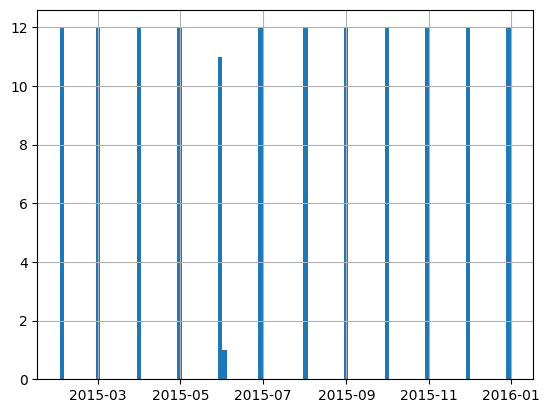

In [10]:
df['date'].hist(bins=100)